<ipython-input-1-19ffc8adfc04>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


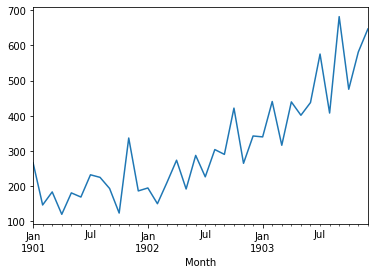

In [1]:
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

import warnings

warnings.filterwarnings("ignore")

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


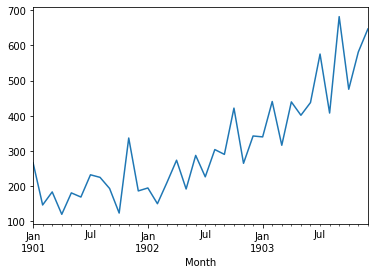

In [9]:

def parser(x):
    return datetime.strptime('190'+ x, '%Y-%m')

#Load shampoo sales data
series = read_csv('shampoo.txt', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

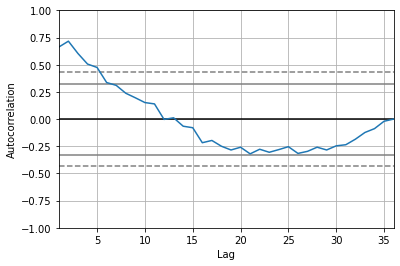

In [2]:
autocorrelation_plot(series)
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Tue, 17 Nov 2020   AIC                            406.340
Time:                        23:00:15   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.001       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

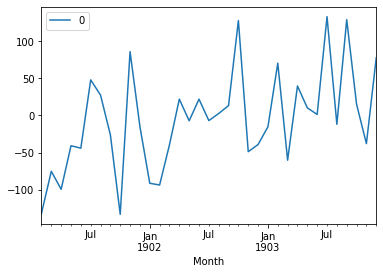

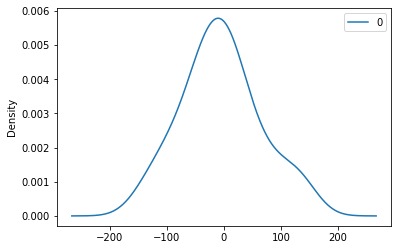

                0
count   35.000000
mean    -5.495222
std     68.132881
min   -133.296621
25%    -42.477898
50%     -7.186555
75%     24.748335
max    133.237950


In [3]:
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=349.117686, expected=342.300000
predicted=306.512952, expected=339.700000
predicted=387.376451, expected=440.400000
predicted=348.154126, expected=315.900000
predicted=386.308854, expected=439.300000
predicted=356.082063, expected=401.300000
predicted=446.379448, expected=437.400000
predicted=394.737311, expected=575.500000
predicted=434.915517, expected=407.600000
predicted=507.923427, expected=682.000000
predicted=435.482996, expected=475.300000
predicted=652.743808, expected=581.300000
predicted=546.343530, expected=646.900000
Test MSE: 6958.323


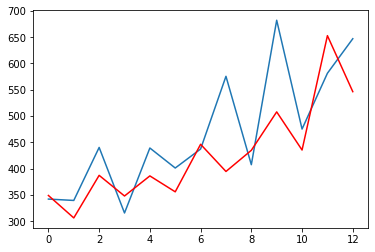

In [4]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [5]:

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [6]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
#warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=52425.268
ARIMA(0, 0, 1) MSE=38145.221
ARIMA(0, 0, 2) MSE=23989.571
ARIMA(0, 1, 0) MSE=18003.173
ARIMA(0, 1, 1) MSE=9558.276
ARIMA(0, 1, 2) MSE=6306.778
ARIMA(0, 2, 0) MSE=67339.808
ARIMA(0, 2, 1) MSE=18321.528
ARIMA(1, 0, 0) MSE=23112.939
ARIMA(1, 0, 2) MSE=7292.317
ARIMA(1, 1, 0) MSE=7121.372
ARIMA(1, 1, 1) MSE=7003.682
ARIMA(1, 2, 0) MSE=18608.005
ARIMA(2, 0, 0) MSE=10176.487
ARIMA(2, 1, 0) MSE=5689.927
ARIMA(2, 1, 1) MSE=7759.707
ARIMA(2, 2, 0) MSE=9860.942
ARIMA(4, 0, 0) MSE=7472.485
ARIMA(4, 1, 0) MSE=6649.596
ARIMA(4, 1, 1) MSE=6796.328
ARIMA(4, 2, 0) MSE=7596.329
ARIMA(4, 2, 1) MSE=4694.873
ARIMA(6, 1, 0) MSE=6810.078
ARIMA(6, 1, 1) MSE=4328.271
ARIMA(6, 2, 0) MSE=6261.126
ARIMA(8, 1, 0) MSE=6579.468
ARIMA(10, 1, 0) MSE=7543.341
Best ARIMA(6, 1, 1) MSE=4328.271


In [10]:
#Forecasting daily female births in California based on dataset from 1958

# load dataset
series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)

#Run ARIMA model
evaluate_models(series.values, p_values, d_values, q_values)

FileNotFoundError: [Errno 2] No such file or directory: 'daily-total-female-births.csv'